In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Unsupervised Learning

This type of learning differs from supervised learning in a very simple way: **the targets are not part of the database**.

> In the unsupervised learning, we have access only to the set of features, $\{\vec{x}_i\}_{i=1}^N$

The loss we have with respect to supervised learning is huge: without the targets, it becomes impossible to estimate the theoretical process $\mathcal{F}$ that generated the data. Therefore, the most we can do in unsupervised learning is the **determination of structure in the data**:

<img src=https://www.researchgate.net/profile/Zhenyu-Wen-2/publication/336642133/figure/fig3/AS:815304842170368@1571395230317/Examples-of-Supervised-Learning-Linear-Regression-and-Unsupervised-Learning.png width=500>

In many applications, this is already enough: it is enough to know that the data is structured (grouped/segmented), being the meaning of each group/segment of less interest, or easily estimated in another way; or, then, determine important aspects of the features by themselves, without any concern with the target.

The two main groups of unsupervised learning techniques are:

- Clustering - way of finding groups (clusters) in the data
- Dimensionality reduction - important preprocessing process that aims to reduce the number of dimensions (features) of a dataset

## Clustering

This type of problem consists of **grouping** similar items, that is, creating **groups** (or **clusters**) of data that are similar to each other.

> The central goal is to **divide the data into distinct groups**, such that **members of each group are similar to each other**

Problems like these can appear in several contexts:

- identification of similar products, for recommendation systems
- grouping of close cities for better logistics of product delivery
- identification of climatic patterns
- identification of genes related to a particular disease
- identification of similar documents in legal proceedings

...and any other problem in which you want to **group similar data** or even **find some structure in your data**, but all this with respect to **features only**.

## K-means algorithm

Documentation: [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

The k-means is used to determine a number **$k$ of clusters in our data**. The first step to apply $k$-means is to determine the number $k$ of clusters.

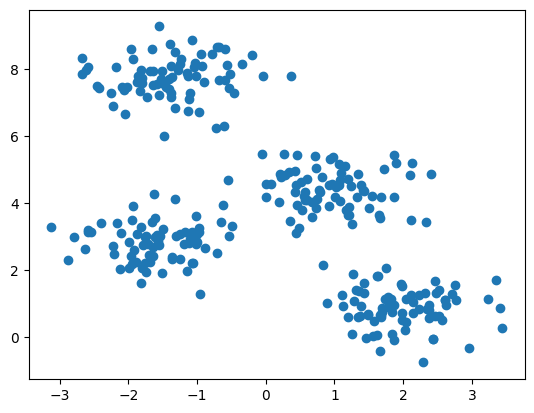

In [2]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:,0], X[:,1]);

In [3]:
pd.DataFrame(X, columns="x1 x2".split()).head()

,x1,x2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


### Building the model

Note that we have only the **features** of the data (in this case, $x_1$ and $x_2$). This characterizes a **unsupervised** clustering problem: when our data **do not have targets**, only features.

We have several arguments in the class, but the main ones are:

>- n_clusters: number of clusters to be found

>- max_iter: maximum number of iterations that the algorithm will do, if it does not converge before that

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

In unsupervised algorithms, there is no division into training data and test data, because there is nothing to test. We just want to find structure in the data.

In [5]:
kmeans.fit(X)

KMeans(n_clusters=4)

The model returns a list with a number of elements equal to the number of points in the dataset, and with values between 0 and k-1, indicating which is the cluster number (the count starts with zero). In our case, as k = 4, we will have clusters 0, 1, 2 and 3. In order to visualize the clusters, just plot the initial data with the appropriate hue.

In [6]:
X_df = pd.DataFrame(X, columns="x1 x2".split())

In [7]:
labels_series = pd.Series(kmeans.labels_, name="label")

In [8]:
df_result = pd.concat([X_df, labels_series], axis=1)
df_result.head()

,x1,x2,label
0,0.836857,2.136359,3
1,-1.413658,7.409623,2
2,1.155213,5.099619,1
3,-1.018616,7.814915,2
4,1.271351,1.892542,3


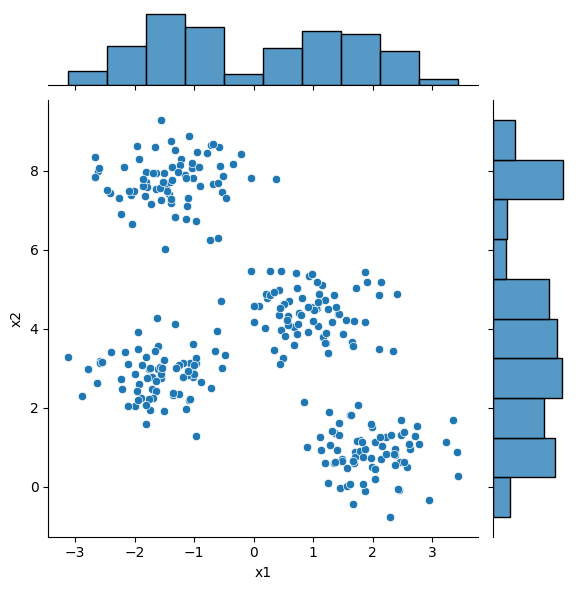

In [9]:
sns.jointplot(data=df_result, x="x1", y="x2");

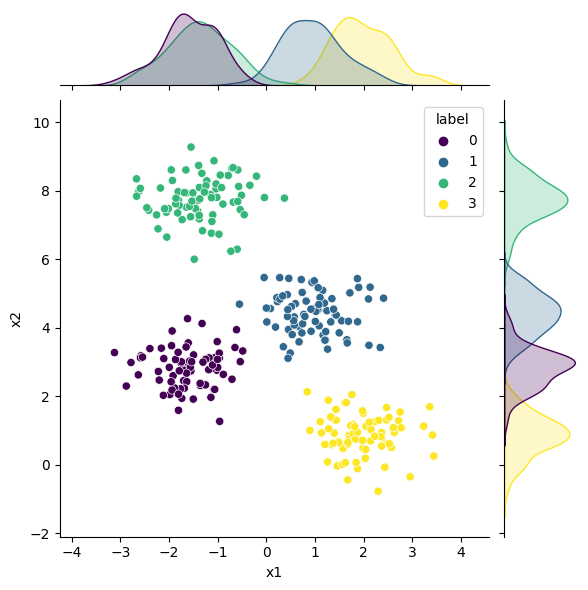

In [10]:
sns.jointplot(data=df_result, x="x1", y="x2", hue="label", palette="viridis");

In practice, the analysis procceeds by debugging each cluster, to understand what each one represents.

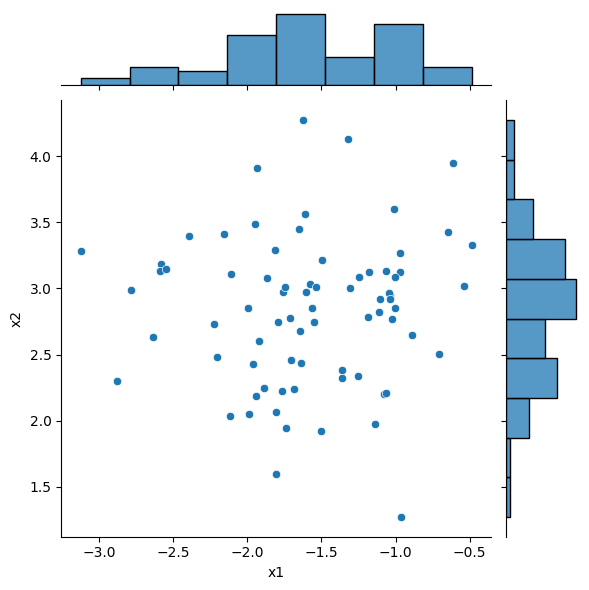

In [11]:
sns.jointplot(data=df_result.query("label == 0"), x="x1", y="x2");

### Determining the $k$

What if it's not so easy to plot the data to determine the $k$? It may be the case that we cannot visualize our data in 2D, if, for example, we have more than 2 features in our data.

> A good heuristic is to use the **business knowledge** to determine the number of clusters. Many times, the problem itself indicates the number of clusters we expect to find.

Nevertheless, there are situations in which the number of clusters is not known a priori. In this situation, we can use the **elbow method**, which consists of running the k-means several times, for different values of k, and then plotting a graph with the **inertia** of each of the rounds.

### Inertia (WCSS) and elbow method

Inertia is also called **WCSS** (Within-Cluster-Sum-of-Squares), that is, "sum of intra-cluster squares", which is calculated as the sum of the distances (squared) between the points and the centroids of the clusters. The smaller the WCSS, the more efficient the clustering, **but up to a point**.

As the number of clusters ($k$) increases, the WCSS decreases, being minimum when each point is its own isolated cluster (which is not useful at all, because if each point is a cluster, there is no clustering at all). So, what we want is not to find a $k$ that minimizes the WCSS, but a $k$ from which the WCSS **stops decreasing so fast**. When we find this $k$, we find the ideal number of clusters for our data. When we plot the WCSS (inertia) as a function of $k$, what we will look for is then the value of $k$ after which **the graph is no longer so inclined**. These points are visualized as "corners", or **elbows** in the graph -- and hence the name of the method.

In [12]:
kmeans.inertia_

212.00599621083478

In [13]:
def calc_inertia(X, k_list, plot=True):

    inertias = []

    X_df = pd.DataFrame(X, columns=[f"X{i+1}" for i in range(X.shape[1])])

    for k in k_list:
        kmeans = KMeans(n_clusters=k).fit(X)
        labels_clusters = kmeans.labels_

        inertia = kmeans.inertia_
        inertias.append(inertia)

        labels_series = pd.Series(labels_clusters, name="label")
        df_result = pd.concat([X_df, labels_series], axis=1)

        if plot and X.shape[1] == 2:
            print(f"\nInertia for clustering with k={k}: {inertia:2f}")
                
            sns.jointplot(data=df_result, x="X1", y="X2", hue="label", palette="viridis")
            plt.show()
            
    return inertias

In [14]:
def elbow_plot(k_list, inertia_list):
    plt.figure(figsize=(8, 5))
    plt.title("Elbow method")
    plt.plot(k_list, inertia_list, marker="o")
    plt.xlabel("k (# of clusters)")
    plt.ylabel("Inertia (WCSS)")
    plt.show()


Inertia for clustering with k=1: 2812.137595


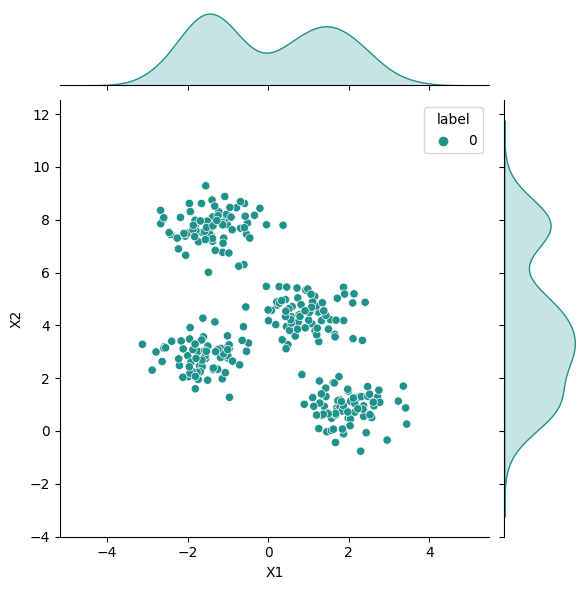


Inertia for clustering with k=2: 1190.782359


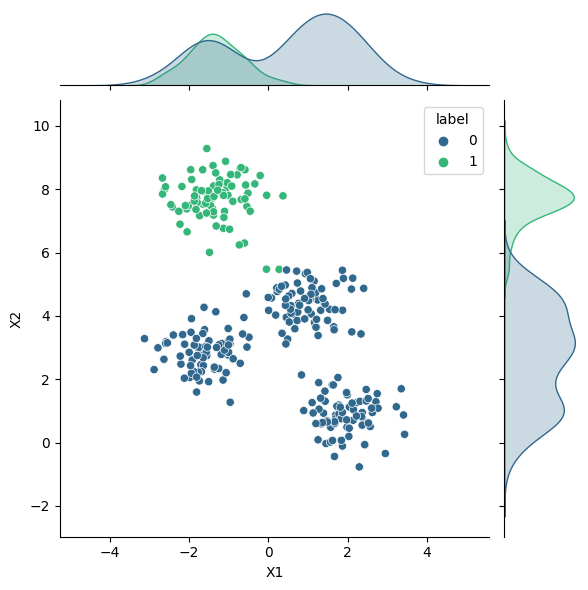


Inertia for clustering with k=3: 546.891150


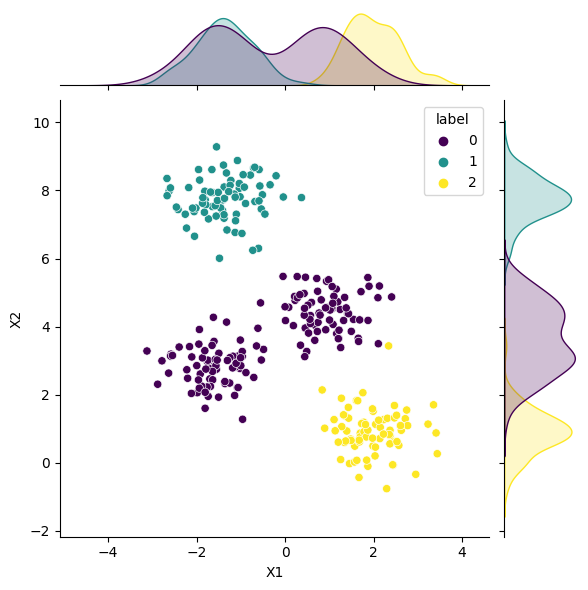


Inertia for clustering with k=4: 212.005996


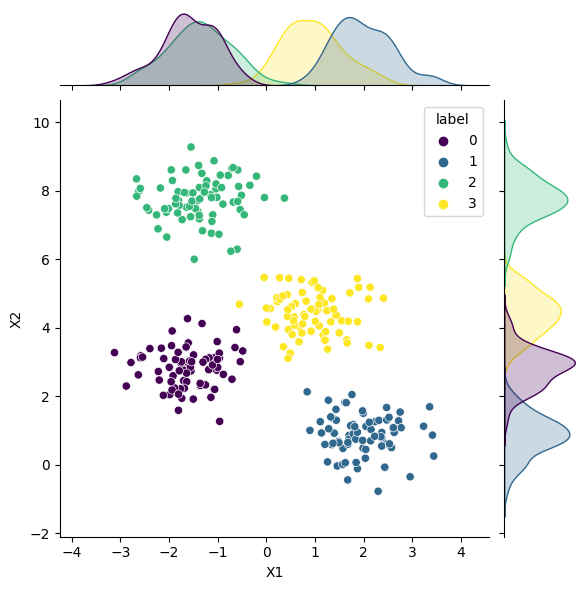


Inertia for clustering with k=5: 188.829860


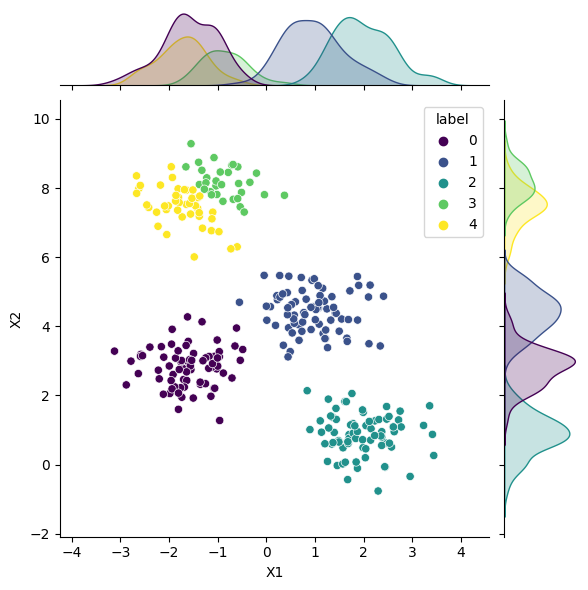


Inertia for clustering with k=6: 170.816791


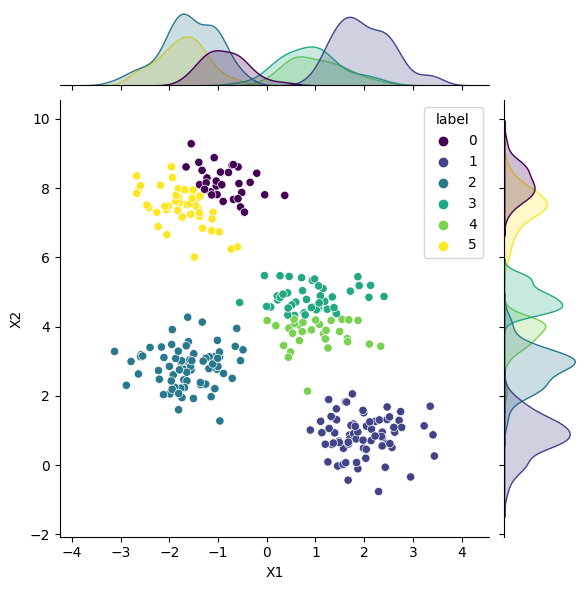


Inertia for clustering with k=7: 152.984300


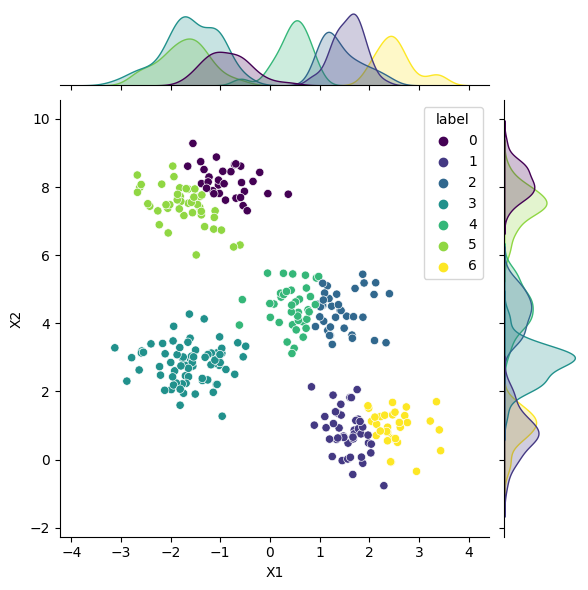


Inertia for clustering with k=8: 136.132090


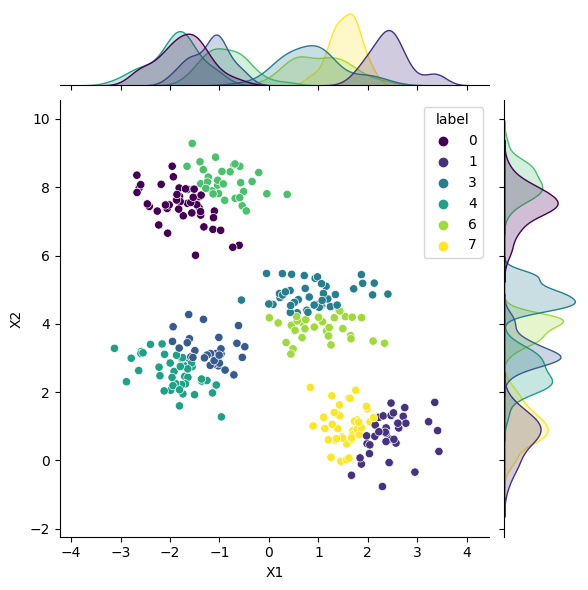


Inertia for clustering with k=9: 124.476505


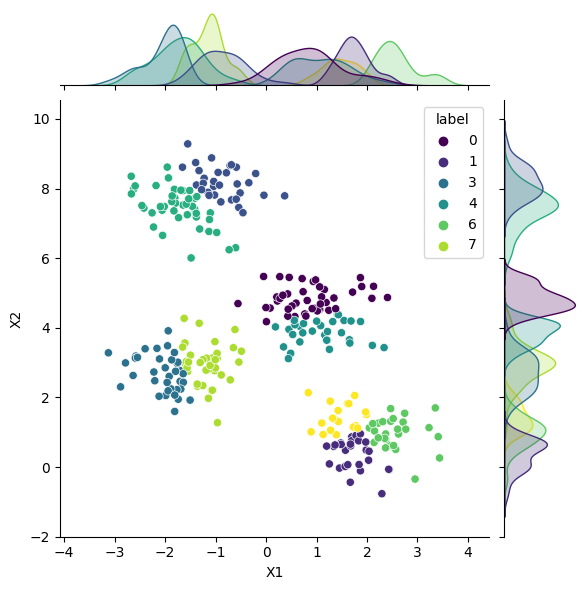


Inertia for clustering with k=10: 113.229353


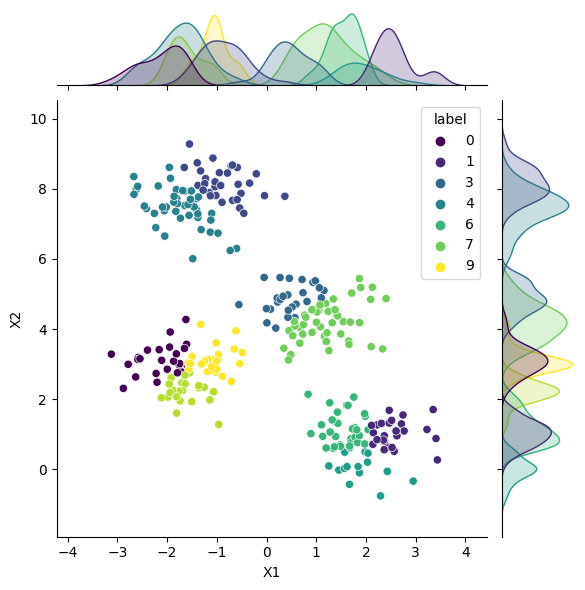

In [15]:
k_list = range(1, 11)
inertia_list = calc_inertia(X, k_list, plot=True)

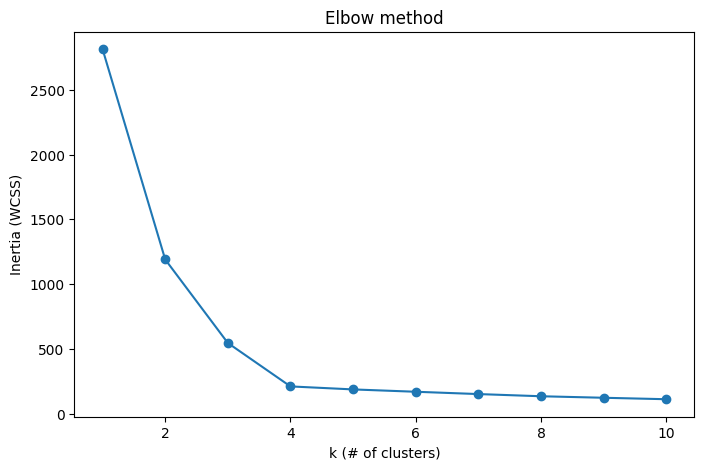

In [16]:
elbow_plot(k_list, inertia_list)

### Silhouette method

An alternative method to the elbow method for calculating the appropriate number of clusters is the silhouette method. In this method, a score known as the **silhouette coefficient** is calculated for each point, which is given by:

$$ s = \frac{b - a}{max(a, b)} $$

where:

- $a$ is the **average distance between a given point and the points of its own cluster**. Therefore, this is a measure of **similarity between a point and its cluster**
- $b$ is the **average distance between a given point and the points of the nearest cluster (other than its own)**. Therefore, this is a measure of **dissimilarity between a point and the other clusters**

Graphically:

<img src=https://miro.medium.com/max/712/1*cUcY9jSBHFMqCmX-fp8BvQ.jpeg width=400>

Note that $-1 < s < 1$, being closer to $1$ when a point is in the correct cluster ($a \ll b$); and closer to $-1$ when a point is in the wrong cluster ($b \gg a$).

In practice, it is customary to look at **the average of the coefficient $s$ for all points, denoted $\bar{s}$**, and present a single metric. The idea is that if, on average, we have points in correct clusters, we will have $\bar{s} \rightarrow 1$; while, if on average we have many points in incorrect clusters, we will have $\bar{s} \rightarrow -1$.

This score is calculated with the [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) function from sklearn.

Once we can calculate the score for a given $k$, the decision on the best $k$ follows similar to the elbow method: just calculate the silhouette score for several values of $k$, and select the one that gives **the silhouette closest to $1$**.

In [17]:
from sklearn.metrics import silhouette_score

def calc_silhouette(X, k_list, plot=True):
    silhouette_list = []

    X_df = pd.DataFrame(X, columns=[f"X{i+1}" for i in range(X.shape[1])])

    for k in k_list:
        kmeans = KMeans(n_clusters=k).fit(X)
        silhouette = silhouette_score(X, kmeans.labels_)
        silhouette_list.append(silhouette)

        labels_series = pd.Series(kmeans.labels_, name="label")
        df_result = pd.concat([X_df, labels_series], axis=1)

        if plot and X.shape[1] == 2:
            print(f"\nSilhouette for clustering with k={k}: {silhouette:2f}")
            sns.jointplot(data=df_result, x="X1", y="X2", hue="label", palette="viridis")
            plt.show()
            
    return silhouette_list

In [18]:
silhouette_list = calc_silhouette(X, range(2, 11), plot=False)
silhouette_list

[0.5426422297358302,
 0.5890390393551768,
 0.6819938690643478,
 0.5923875148758644,
 0.49613625008016793,
 0.3996124342270056,
 0.32596999269955423,
 0.33970036029821526,
 0.33254568762212444]

In [19]:
def silhouette_plot(X, k_list, plot=True):
    silhouette_list = calc_silhouette(X, k_list, plot=False)
    plt.figure(figsize=(8, 5))
    plt.title("Silhouette method")
    plt.plot(k_list, silhouette_list, marker="o")
    plt.xlabel("k (# of clusters)")
    plt.ylabel("Mean silhouette score")
    plt.show()

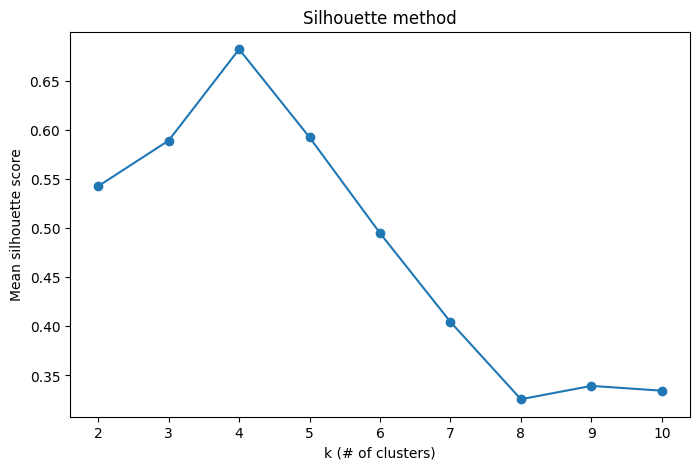

In [20]:
silhouette_plot(X, k_list=range(2, 11), plot=True)

Here again, it is clear that the ideal is $k=4$. To understand why the method is called "silhouette", we can use the following code from sklearn, [explanation here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

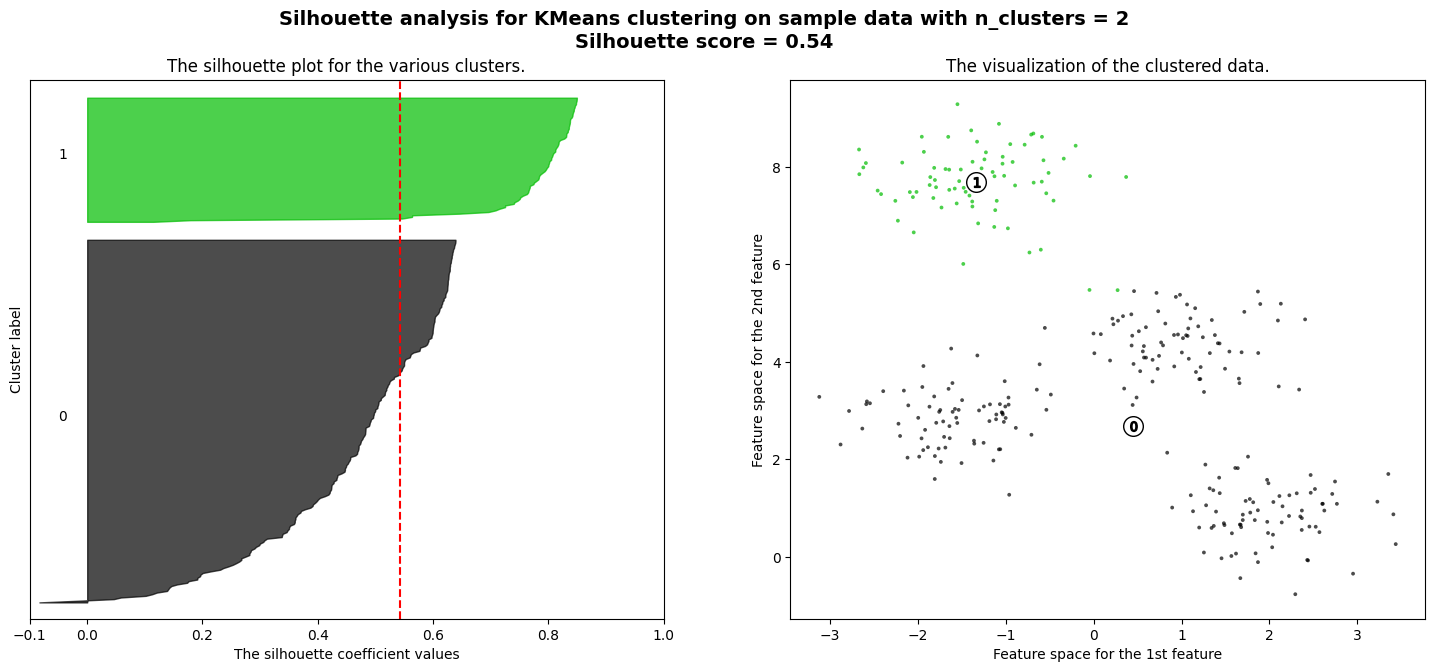

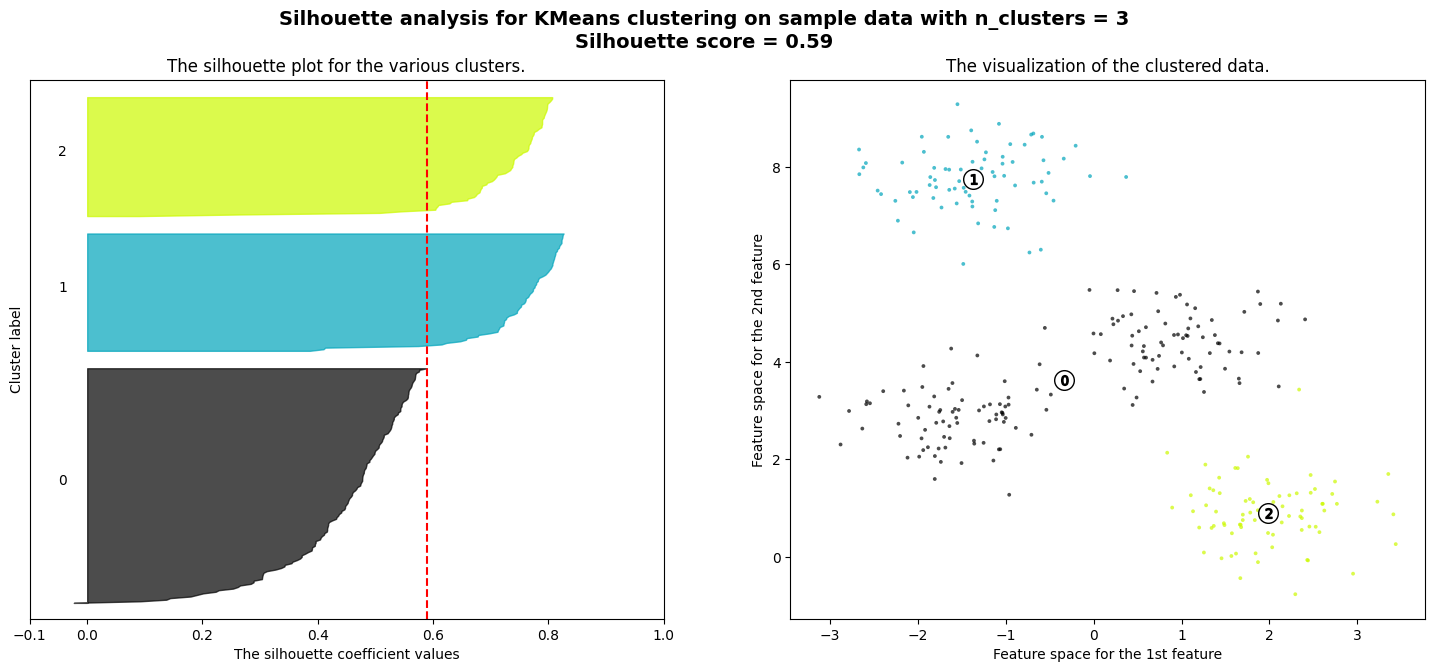

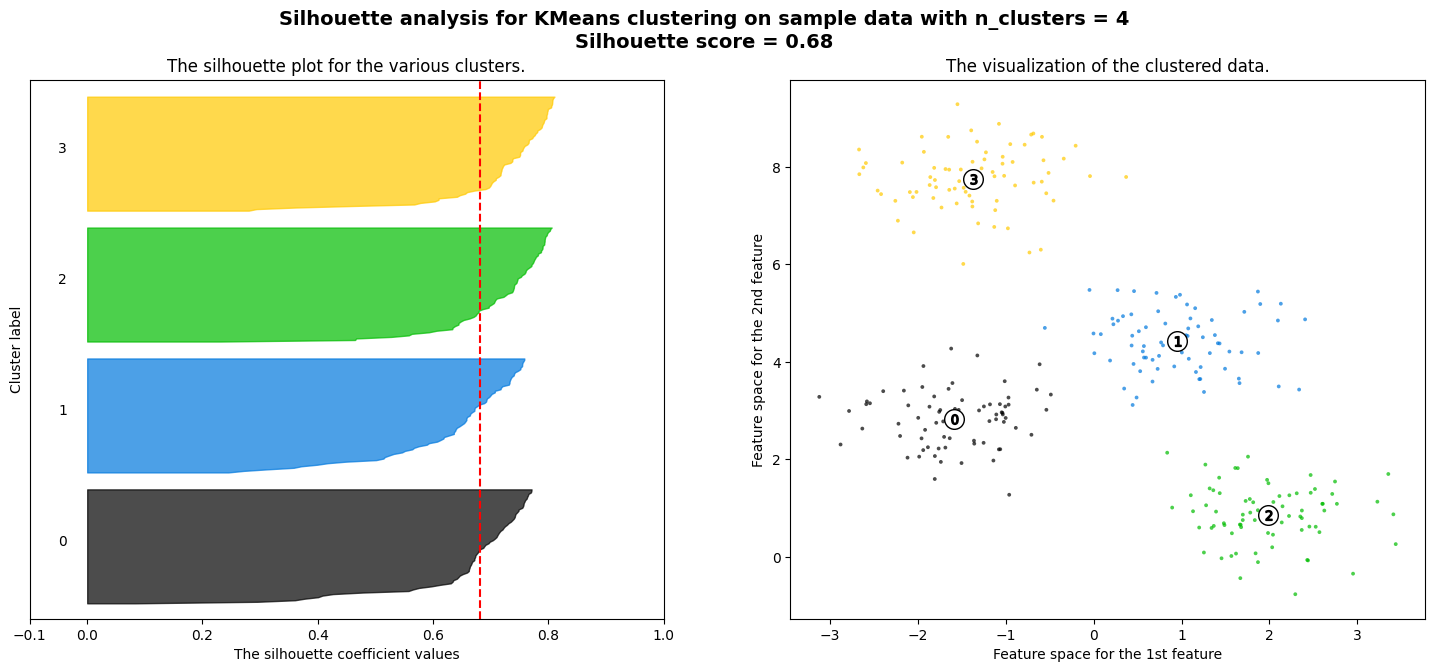

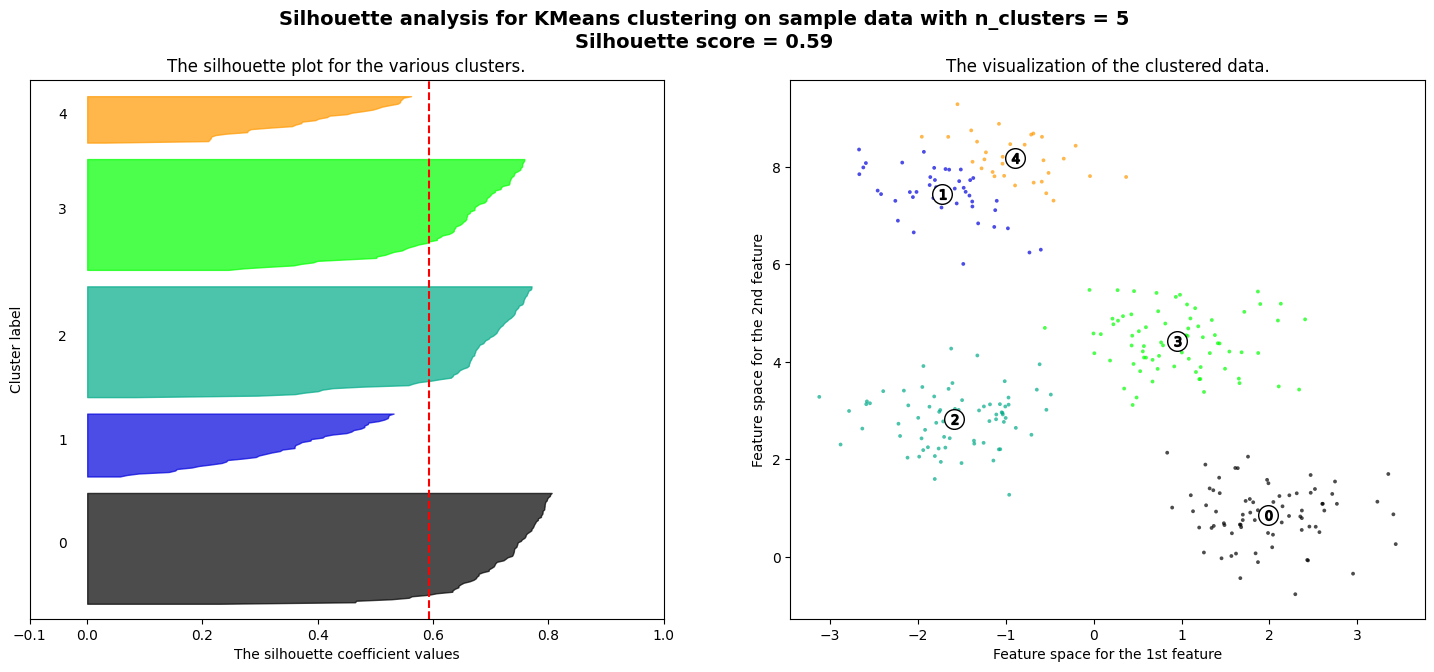

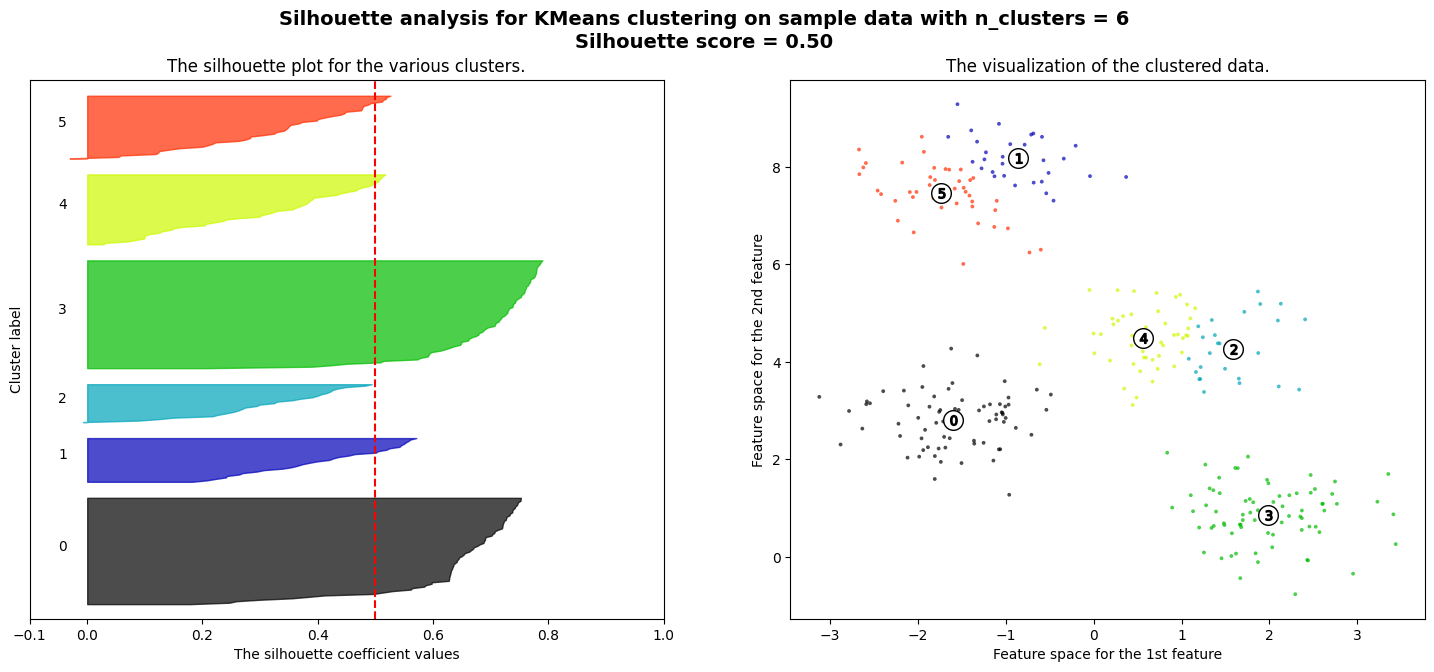

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    title = "Silhouette analysis for KMeans clustering on sample data "
    title += "with n_clusters = {}\nSilhouette score = {:.2f}".format(n_clusters, silhouette_avg)
    plt.suptitle(title, fontsize=14, fontweight='bold')

    plt.show()

### And how does k-means work?

Once the number of clusters have been chosen, k-means follows the following steps:

- k points are randomly chosen as the centroids of the clusters

- for each point, we calculate which is the distance between it and the k centroids. The centroid that is closest will be the cluster to which this point belongs. We do this for all points

- at the end of step 2, we will have k clusters, each with its centroid, and all points will belong to a certain cluster

- once we have the clusters, we calculate which is in fact the center of each one of them. This is done by taking the average of the position of all points

- after determining the new k centroids, we repeat the process

- and the process repeats until the centroids no longer change. When this convergence is reached (or after the determined number of iterations), the algorithm ends

<img src="https://miro.medium.com/max/1280/1*rwYaxuY-jeiVXH0fyqC_oA.gif" width=500>